In [1]:
# Importing the Libraries
import numpy as np
import pandas as pd

In [2]:
dataset=pd.read_csv("Social_Network_Ads.csv")
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
# Convert Categorical data to Numerical Data
# It's a Nominal Data-One Hand Encoding
dataset=pd.get_dummies(dataset,drop_first=True)
dataset

,User ID,Age,EstimatedSalary,Purchased,Gender_Male
0,15624510,19,19000,0,1
1,15810944,35,20000,0,1
2,15668575,26,43000,0,0
3,15603246,27,57000,0,0
4,15804002,19,76000,0,1
...,...,...,...,...,...
395,15691863,46,41000,1,0
396,15706071,51,23000,1,1
397,15654296,50,20000,1,0
398,15755018,36,33000,0,1


In [4]:
dataset.columns

Index(['User ID', 'Age', 'EstimatedSalary', 'Purchased', 'Gender_Male'], dtype='object')

In [5]:
dataset["Purchased"].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [6]:
# Independent Input
independent=dataset[["Age", "EstimatedSalary", "Gender_Male"]]
independent

,Age,EstimatedSalary,Gender_Male
0,19,19000,1
1,35,20000,1
2,26,43000,0
3,27,57000,0
4,19,76000,1
...,...,...,...
395,46,41000,0
396,51,23000,1
397,50,20000,0
398,36,33000,1


In [7]:
# Dependent Output
dependent=dataset[['Purchased']]
dependent

,Purchased
0,0
1,0
2,0
3,0
4,0
...,...
395,1
396,1
397,1
398,0


In [8]:
# Split Train/Test Set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(independent,dependent,test_size=0.30,random_state=0)

In [9]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(splitter="best")
classifier=classifier.fit(X_train,y_train)

Matplotlib is building the font cache; this may take a moment.


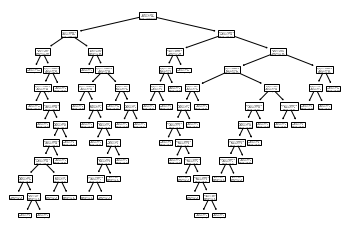

In [10]:
# Importing the Library for Graph 
# How our model is create
import matplotlib.pyplot as plt
from sklearn import tree
tree.plot_tree(classifier)
plt.show()

In [11]:
y_pred=classifier.predict(X_test)

In [12]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[71,  8],
       [ 6, 35]], dtype=int64)

In [13]:
from sklearn.metrics import classification_report
clf_report=classification_report(y_test,y_pred)

In [14]:
print(clf_report)

              precision    recall  f1-score   support

           0       0.92      0.90      0.91        79
           1       0.81      0.85      0.83        41

    accuracy                           0.88       120
   macro avg       0.87      0.88      0.87       120
weighted avg       0.89      0.88      0.88       120



In [15]:
#Save the Model
import pickle
filename="finalized_model_Decision_Tree_Classification.sav"
pickle.dump(classifier,open(filename,'wb'))

In [16]:
#Load the Model
loaded_model=pickle.load(open("finalized_model_Decision_Tree_Classification.sav",'rb'))
result=loaded_model.predict([[2312,5634,29856]])
result

C:\anaconda\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([1], dtype=int64)